In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
import os
import numpy as np

In [10]:
pip install 'h5py==2.10.0' --force-reinstall

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'h5py==2.10.0'"


In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
x_train=train_datagen.flow_from_directory(r"D:\IBM\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [5]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [14]:
from tensorflow.keras import metrics

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy',metrics.Precision(), metrics.Recall()])

In [8]:
len(x_train)

475

In [17]:
history = model.fit(x_train,steps_per_epoch=len(x_train),epochs=10)

Epoch 1/10
475/475 [==============================] - 107s 224ms/step - loss: 0.2196 - accuracy: 0.9258 - precision: 0.9364 - recall: 0.9161
Epoch 2/10
475/475 [==============================] - 106s 223ms/step - loss: 0.2114 - accuracy: 0.9293 - precision: 0.9370 - recall: 0.9223
Epoch 3/10
475/475 [==============================] - 105s 220ms/step - loss: 0.1832 - accuracy: 0.9356 - precision: 0.9428 - recall: 0.9291
Epoch 4/10
475/475 [==============================] - 106s 222ms/step - loss: 0.1753 - accuracy: 0.9397 - precision: 0.9472 - recall: 0.9332
Epoch 5/10
475/475 [==============================] - 116s 244ms/step - loss: 0.1669 - accuracy: 0.9423 - precision: 0.9486 - recall: 0.9361
Epoch 6/10
475/475 [==============================] - 110s 232ms/step - loss: 0.1502 - accuracy: 0.9468 - precision: 0.9521 - recall: 0.9418
Epoch 7/10
475/475 [==============================] - 113s 238ms/step - loss: 0.1544 - accuracy: 0.9487 - precision: 0.9543 - recall: 0.9438
Epoch 8/10
47

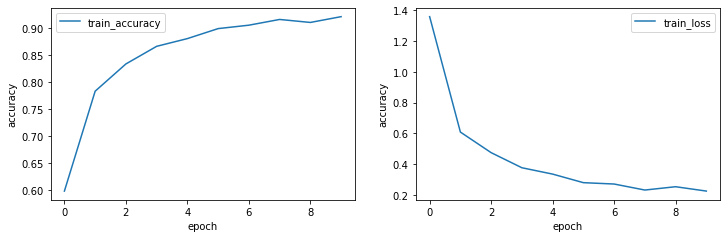

In [10]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()


    
plot_results(model)

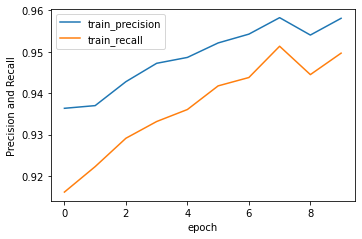

In [20]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2,1)
  plt.plot(history.history['precision'], label = 'train_precision')
  plt.plot(history.history['recall'], label = 'train_recall')
  plt.xlabel('epoch')
  plt.ylabel('Precision and Recall')
  plt.legend()
  plt.show()


    
plot_results(model)

In [11]:
model.save('VegModel')

INFO:tensorflow:Assets written to: VegModel\assets


In [2]:
F1score = (2*0.9581*0.94) / (0.9581 + 0.94)
print("The F1 Score is ", F1score)

The F1 Score is  0.9489637005426479
